In [0]:
#To mount Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merge_distance_intensity.csv")
df.shape

(661294, 34)

In [0]:
df.dropna(inplace=True)

df["damage_grade"] = df["damage_grade"].str.replace("Grade ", "")
df["damage_grade"] = df["damage_grade"].astype(int)
rubble = ["Damaged-Rubble unclear", "Damaged-Rubble clear", "Damaged-Rubble Clear-New building built"]
damage = ["Damaged-Used in risk", "Damaged-Repaired and used", "Damaged-Not used"]
landslide = "Covered by landslide"
nd = "Not damaged"

df["condition_post_eq"] = df["condition_post_eq"].replace(rubble, 2)
df["condition_post_eq"] = df["condition_post_eq"].replace(damage, 1)
df["condition_post_eq"] = df["condition_post_eq"].replace(landslide, 3)
df["condition_post_eq"] = df["condition_post_eq"].replace(nd, 0)

df["land_surface_condition"] = df["land_surface_condition"].replace("Flat", 0)
df["land_surface_condition"] = df["land_surface_condition"].replace("Moderate slope", 1)
df["land_surface_condition"] = df["land_surface_condition"].replace("Steep slope", 2)

df["foundation_type"] = df["foundation_type"].replace("Other",0)
df["foundation_type"] = df["foundation_type"].replace("Mud mortar-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Cement-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Bamboo/Timber",3)
df["foundation_type"] = df["foundation_type"].replace("RC",2)

df["roof_type"] = df["roof_type"].replace("RCC/RB/RBC",0)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Light roof",1)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Heavy roof",2)

df["ground_floor_type"] = df["ground_floor_type"].replace("Mud",1)
df["ground_floor_type"] = df["ground_floor_type"].replace("Brick/Stone",2)
df["ground_floor_type"] = df["ground_floor_type"].replace("RC",3)
df["ground_floor_type"] = df["ground_floor_type"].replace("Timber",4)
df["ground_floor_type"] = df["ground_floor_type"].replace("Other",0)

df["other_floor_type"] = df["other_floor_type"].replace("Not applicable",0)
df["other_floor_type"] = df["other_floor_type"].replace("TImber/Bamboo-Mud",3)
df["other_floor_type"] = df["other_floor_type"].replace("Timber-Planck",2)
df["other_floor_type"] = df["other_floor_type"].replace("RCC/RB/RBC",1)

df["position"] = df["position"].replace("Not attached",0)
df["position"] = df["position"].replace("Attached-1 side",1)
df["position"] = df["position"].replace("Attached-2 side",2)
df["position"] = df["position"].replace("Attached-3 side",3)

df = pd.get_dummies(data = df, columns = ["plan_configuration"])

X = df[['count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape', 'Intensity']]
y = df["damage_grade"]

Standardize the variables

In [0]:
scaler = StandardScaler()
scaler_fit = scaler.fit(X)
X = scaler_fit.transform(X)

Split into train and test data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Fit into the model

In [0]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    learning_rate=1)

bdt_real.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
predictions_real = bdt_real.predict(X_test)

Measurements

In [0]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions_real))
# Accuracy
accuracy = accuracy_score(y_test,predictions_real)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy
print("Misclassification Rate:", misclassified)
# Precision, Recall and F Score
precision = metrics.precision_score(y_test,predictions_real, average = 'micro')
recall = metrics.recall_score(y_test, predictions_real, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions_real, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[ 9666  1488  1077   676   631]
 [ 4414  2158  3339  2573  2058]
 [ 2222  1404  6552  7142  5967]
 [  876   604  4165 12765 13440]
 [  719   429  2156  7096 38640]]
Accuracy: 0.5276166856952751
Misclassification Rate: 0.4723833143047249
Precision: 0.5276166856952751
Recall: 0.5276166856952751
F-measure: 0.5276166856952751


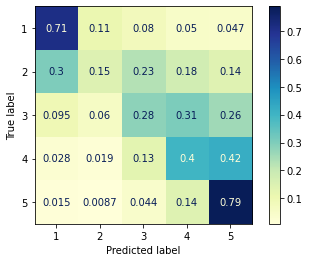

In [0]:
#Plot Confusion Matrix
disp = plot_confusion_matrix(bdt_real, X_test, y_test, cmap=plt.cm.YlGnBu,normalize="true")


Feature Selection

In [0]:
selected_features = [ 'has_superstructure_bamboo',
                      'land_surface_condition',
                     'height_ft_pre_eq',
                     'count_floors_pre_eq',
                      'Intensity',
                      'ground_floor_type','roof_type','other_floor_type', 'plan_configuration_Square','has_superstructure_cement_mortar_stone','plan_configuration_Others',
                     'has_superstructure_other','has_superstructure_rc_non_engineered','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','plan_configuration_E-shape','plan_configuration_U-shape', 'plan_configuration_H-shape']
train_values_subset = X_train[selected_features]
test_values = X_test[selected_features]

In [0]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    learning_rate=1)
bdt_real.fit(train_values_subset, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Measurements with Feature Selection

In [0]:
predictions = bdt_real.predict(test_values)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy 
print("Misclassification Rate:", misclassified)
# Precision and Recall
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[ 9630  1386  1121   719   682]
 [ 4599  1942  3456  2617  1928]
 [ 2485  1257  6929  7066  5550]
 [  986   550  4284 13050 12980]
 [  780   440  2460  6997 38363]]
Accuracy: 0.52862230354537
Misclassification Rate: 0.47137769645463
Precision: 0.52862230354537
Recall: 0.52862230354537
F-measure: 0.52862230354537


SMOTE

In [0]:
smote = SMOTE("minority")

In [0]:
X_sm, y_sm = smote.fit_sample(train_values_subset, y_train)

bdt_real.fit(X_sm, y_sm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
test_values = X_test[selected_features]

Measurements with SMOTE (after Feature Selection)

In [0]:
# Compare results
predictions = bdt_real.predict(test_values)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy 
print("Misclassification Rate:", misclassified)
# Precision and Recall
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[11620   324   483   579   532]
 [ 6832   865  2538  2497  1810]
 [ 4634   541  5644  6858  5610]
 [ 2394   269  3713 12398 13076]
 [ 1751   223  2171  6758 38137]]
Accuracy: 0.5191710079617714
Misclassification Rate: 0.4808289920382286
Precision: 0.5191710079617714
Recall: 0.5191710079617714
F-measure: 0.5191710079617714


Class Weights

In [0]:
class_weights = list(class_weight.compute_class_weight("balanced", np.unique(y), y))

w_array = np.ones(y_train.shape[0], dtype = "float")
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

bdt_real.fit(train_values_subset, y_train, sample_weight=w_array)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Measurements with Class Weights (after Feature Selection)

In [0]:
# Compare results
predictions = bdt_real.predict(test_values)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy 
print("Misclassification Rate:", misclassified)
# Precision and Recall
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[10301  2003   619   376   239]
 [ 5133  3723  3199  1675   812]
 [ 3003  3619  8659  5249  2757]
 [ 1417  2556  7147 12800  7930]
 [ 1144  1921  4433  9765 31777]]
Accuracy: 0.5085553127622735
Misclassification Rate: 0.4914446872377265
Precision: 0.5085553127622735
Recall: 0.5085553127622735
F-measure: 0.5085553127622735


SMOTE & Class Weights

In [0]:
X_sm, y_sm = smote.fit_sample(train_values_subset, y_train)
class_weights = list(class_weight.compute_class_weight("balanced", np.unique(y), y))

w_array = np.ones(y_sm.shape[0], dtype = "float")
for i, val in enumerate(y_sm):
    w_array[i] = class_weights[val-1]

bdt_real.fit(X_sm, y_sm,sample_weight=w_array)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Measurements with SMOTE & Class Weights (after Feature Selection)

In [0]:
# Compare results
predictions = bdt_real.predict(test_values)
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

#Misclassification rate 
misclassified = 1 - accuracy 
print("Misclassification Rate:", misclassified)
# Precision and Recall
precision = metrics.precision_score(y_test,predictions, average = 'micro')
recall = metrics.recall_score(y_test, predictions, average = 'micro')
f_measure = metrics.f1_score(y_test, predictions, average = 'micro')
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

[[12021   510   435   350   222]
 [ 7522  1701  2754  1774   791]
 [ 5658  1732  7712  5634  2551]
 [ 3544  1216  6401 13079  7610]
 [ 2734   903  3898 10340 31165]]
Accuracy: 0.4965937530716711
Misclassification Rate: 0.5034062469283289
Precision: 0.4965937530716711
Recall: 0.4965937530716711
F-measure: 0.4965937530716711
